## This is WIP Notebook

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
zomato=pd.read_csv('zomato.csv')

In [70]:
# zomato.head()

In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         1133 non-null   int64  
 1   Restaurant Name       1133 non-null   object 
 2   Country Code          1133 non-null   int64  
 3   City                  1133 non-null   object 
 4   Address               1133 non-null   object 
 5   Locality              1133 non-null   object 
 6   Locality Verbose      1133 non-null   object 
 7   Longitude             1133 non-null   float64
 8   Latitude              1133 non-null   float64
 9   Cuisines              1133 non-null   object 
 10  Average Cost for two  1133 non-null   int64  
 11  Has Table booking     1133 non-null   int64  
 12  Has Online delivery   1133 non-null   int64  
 13  Is delivering now     1133 non-null   int64  
 14  Switch to order menu  1133 non-null   int64  
 15  Price range          

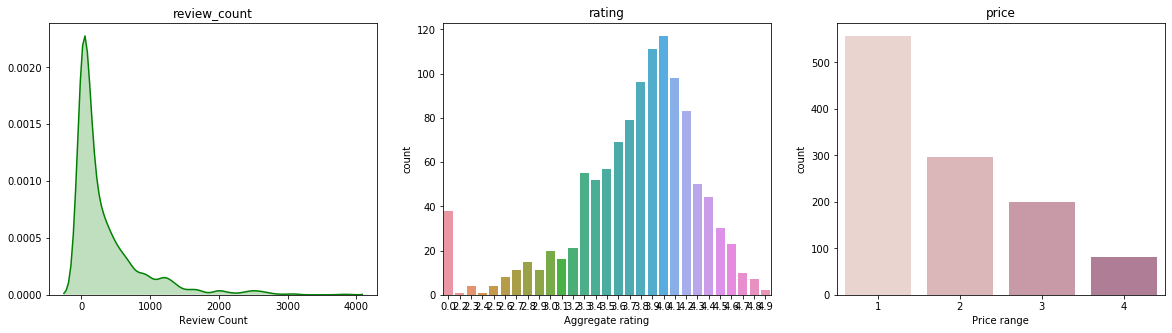

In [5]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.set_palette(sns.cubehelix_palette(8))
sns.distplot(zomato['Review Count'], hist=False, color="g", ax=axes[0], kde_kws={"shade": True}).set_title('review_count')
sns.countplot(zomato['Aggregate rating'],ax=axes[1]).set_title('rating')
sns.countplot(zomato['Price range'],ax=axes[2]).set_title('price')
plt.show()

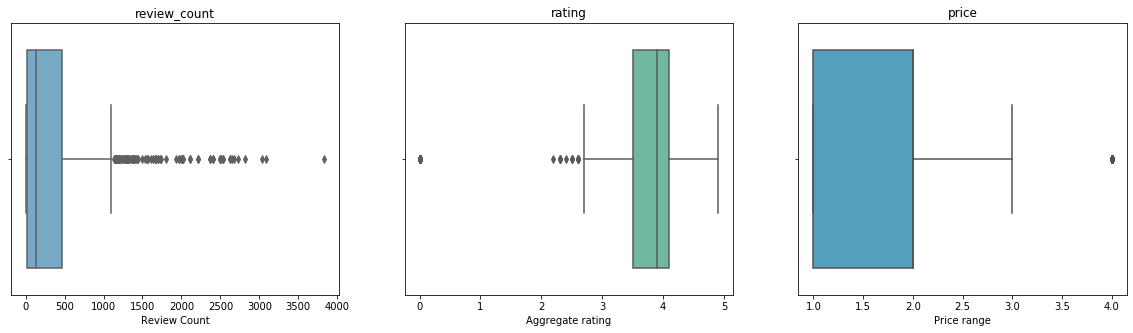

In [6]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(zomato['Review Count'],ax=axes[0],palette='Blues').set_title('review_count')
sns.boxplot(zomato['Aggregate rating'],ax=axes[1], palette='BuGn_r').set_title('rating')
sns.boxplot(zomato['Price range'],ax=axes[2], palette='GnBu_d').set_title('price')
plt.show()

In [58]:
gdf = gpd.GeoDataFrame(
    zomato, geometry=gpd.points_from_xy(zomato.Longitude, zomato.Latitude))

In [59]:
gdf.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Review Count,geometry
0,18335280,Ancient Hyderabad,1,Pune,"Opposite Godavari Ruchulu, Hinjewadi-Marunji R...",Hinjawadi,"Hinjawadi, Pune",73.734539,18.59572,"North Indian, Chinese, Biryani, Beverages",...,1,1,1,0,2,3.8,Good,0,1318,POINT (73.73454 18.59572)


In [68]:
fp = "data/maharashtra_administrative/maharashtra_administrative.shp"
map_df = gpd.read_file(fp)
# pd.set_option('display.max_rows', map_df.shape[0]+1)

# map_df.head(100)
map_df = map_df[map_df['NAME'] == "Pune"]

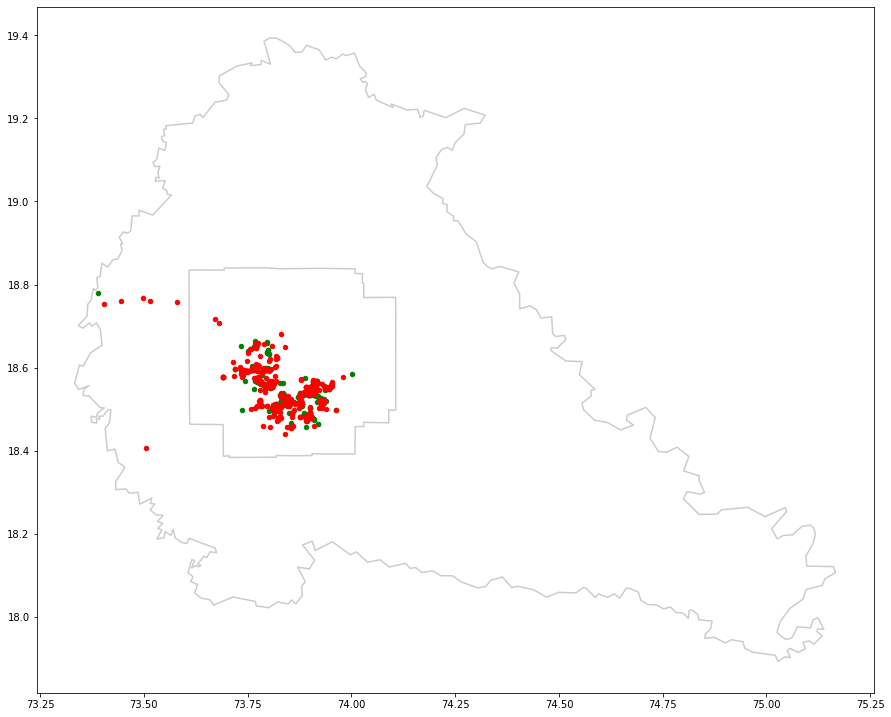

In [69]:
fig,ax = plt.subplots(figsize=(15,20))
map_df.plot(ax=ax, alpha=0.4, color="grey")

gdf[gdf['Rating text'] == "Very Good"].plot(ax=ax, color='green',markersize=20)
gdf[gdf['Rating text'] == "Good"].plot(ax=ax, color='red',markersize=20)
